<a href="https://colab.research.google.com/github/quangviet/python4engineer/blob/main/Problem_4/problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thông tin học viên

Học viên: Phạm Quang Việt

Mã học viên: 22MSE23069

Email: viet22mse23069@fsb.edu.vn

Bài 4 - Hãy sử dụng Python và Jupyter Notebook để trả lời các câu hỏi sau:
- Tiền xử lý dữ liệu (xử lý các trường hợp thiếu dữ liệu, chuẩn hóa ngày tháng, đơn vị,...).
- Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.
- Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất?
- Tính thời gian trung giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.
- Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất.
- Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua.
- Cho biết các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).
- Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.
- Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category.
- Dự báo doanh số theo nhiều khía cạnh khác nhau trong tương lai: theo vùng, theo bang, theo category,..  và phát hành API để khai thác.


Note: Do không có yêu cầu bắt buộc nên bày này sử dụng tiếng Anh để comment

## Prepare data

In [1]:
%env KAGGLE_USERNAME=quangviet
%env KAGGLE_KEY=e78ec69319c278806b1208176ad50255
!kaggle datasets download -d rohitsahoo/sales-forecasting
!unzip -o /content/sales-forecasting.zip -d ./input

env: KAGGLE_USERNAME=quangviet
env: KAGGLE_KEY=e78ec69319c278806b1208176ad50255
sales-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/sales-forecasting.zip
  inflating: ./input/train.csv       


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('./input/train.csv')

./input/train.csv


### Check dataset information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df[:3]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


## 1. Tiền xử lý dữ liệu (xử lý các trường hợp thiếu dữ liệu, chuẩn hóa ngày tháng, đơn vị,...).

In [5]:
# Kiểm tra null
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Only 11 null in postal code. Other fields are ok

In [6]:
# List all row with null. All in Burlington, Vermont
df[df.isnull().any(axis=1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [7]:
# Drop row with null
# df = df.dropna()
# df.info()

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = '%d/%m/%Y')

#calculate sum of values, grouped by quarter
# df.groupby(df['date'].dt.to_period('Q'))['values'].sum()

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [9]:
df.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [10]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [11]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [12]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [13]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [14]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2015-01-03 00:00:00'), Timestamp('2018-12-30 00:00:00'))

In [15]:
df['Sales'].min(), df['Sales'].mean(), df['Sales'].max()

(0.444, 230.7690594591837, 22638.48)

## 2. Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.

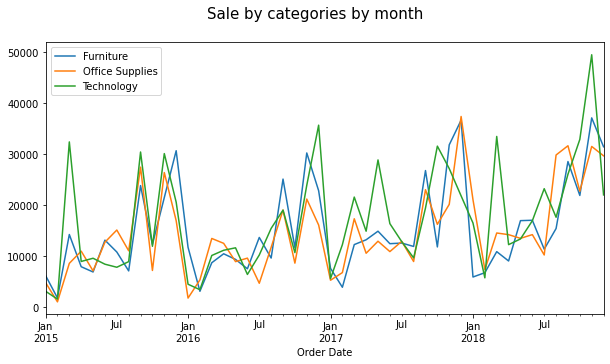

In [16]:
X = df.groupby([df['Category'], df['Order Date'].dt.to_period('M')])['Sales'].sum().reset_index().set_index('Order Date')

plt.figure(figsize=(10, 5)).suptitle('Sale by categories by month', fontsize = 15)
ax = plt.gca()
for i in X['Category'].unique():
  X[X['Category'] == i].plot(ax = ax, label = i, y = 'Sales')
  
plt.show()

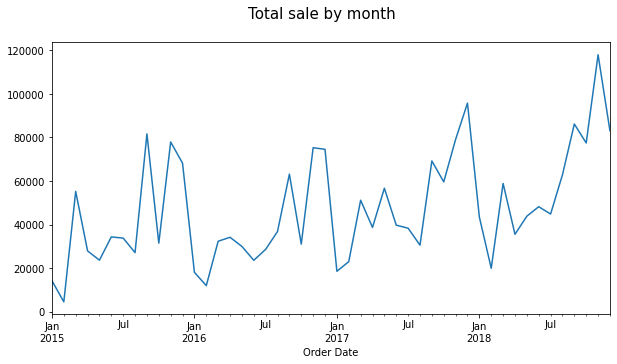

In [17]:
X = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(10, 5)).suptitle('Total sale by month', fontsize = 15)
X.plot()
plt.show()

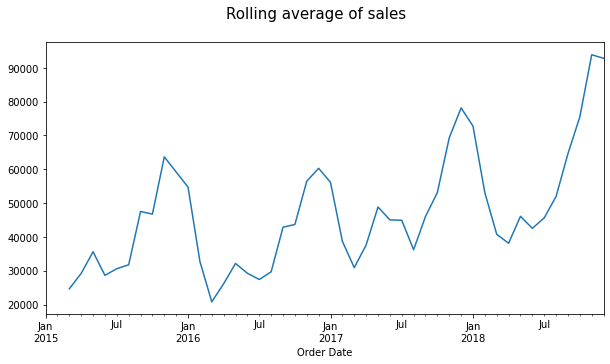

In [18]:
# Rolling average with a window size of 3 months
plt.figure(figsize=(10, 5)).suptitle('Rolling average of sales', fontsize = 15)
X.rolling(3).mean().plot()
plt.show()

In [19]:
print('Mean sale of the last 3 months = ', X.rolling(3).mean()[-1])

Mean sale of the last 3 months =  92805.55833333333


## 3. Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất?

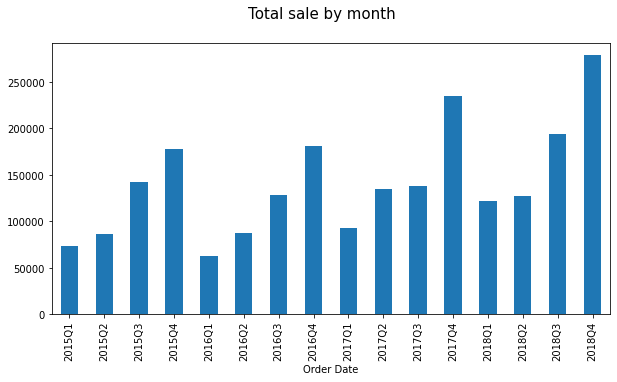

In [20]:
X = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()

plt.figure(figsize=(10, 5)).suptitle('Total sale by month', fontsize = 15)
X.plot(kind = 'bar')
plt.show()

> Observation: Sale increase from Q1 to Q4 and repeat each year. Quarter 4 of 2018 had the highest sales across the dataset

In [21]:
# X = df.groupby([df['Category'], df['Order Date'].dt.to_period('Q')])['Sales'].sum().reset_index().set_index('Order Date')

# x = X.pivot(index = 'Order Date', columns = 'Category')
# print(X)

# plt.figure(figsize=(10, 5)).suptitle('Sale by categories by month', fontsize = 15)
# ax = plt.gca()
# # for i in X['Category'].unique():
# X.plot(ax = ax, y = 'Sales', rot = 0, kind = 'bar')
  
# plt.show()

## 4. Tính thời gian trung giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.

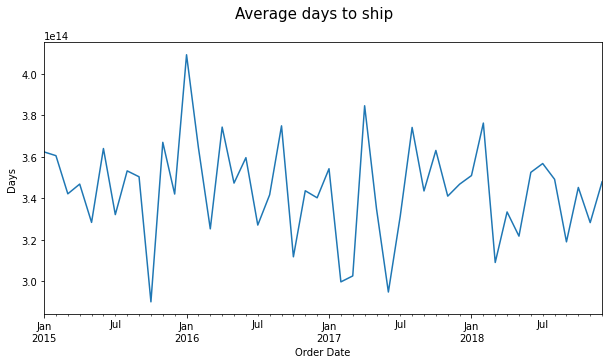

In [22]:
df['Days to Ship'] = df['Ship Date'] - df['Order Date']

X = df.groupby(df['Order Date'].dt.to_period('M'))['Days to Ship'].mean()

plt.figure(figsize=(10, 5)).suptitle('Average days to ship', fontsize = 15)
X.plot(ylabel = 'Days')
plt.show()

## 5. Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất.

In [23]:
print('Number of unique city names = ', df['City'].nunique())
print('Number of unique city - state names = ', len(df.groupby(['City', 'State'])))

Number of unique city names =  529
Number of unique city - state names =  600


> Observation: Because the number of unique pair of city and state names was higher than the number of unique city names, many different cities in the data set have the same name. We don't have to check the same city names in different countries as the data set only have 1 country (US).

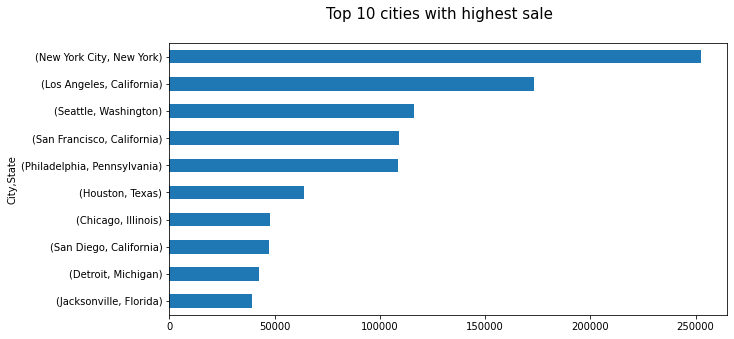

In [24]:
X = df.groupby(['City','State'])['Sales'].sum().sort_values()
plt.figure(figsize=(10, 5)).suptitle('Top 10 cities with highest sale', fontsize = 15)
X[-10:].plot(kind='barh')
plt.show()

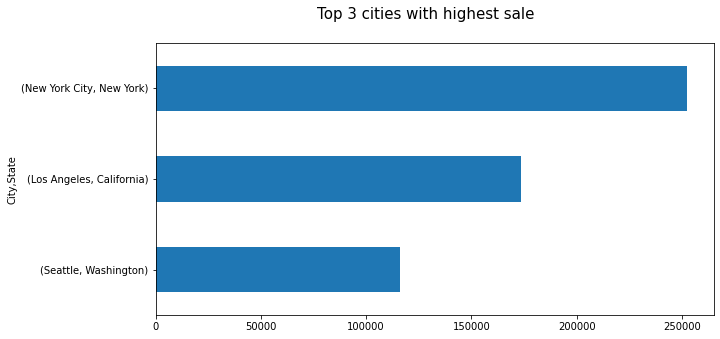

In [25]:
X = df.groupby(['City','State'])['Sales'].sum().sort_values()
plt.figure(figsize=(10, 5)).suptitle('Top 3 cities with highest sale', fontsize = 15)
X[-3:].plot(kind='barh')
plt.show()

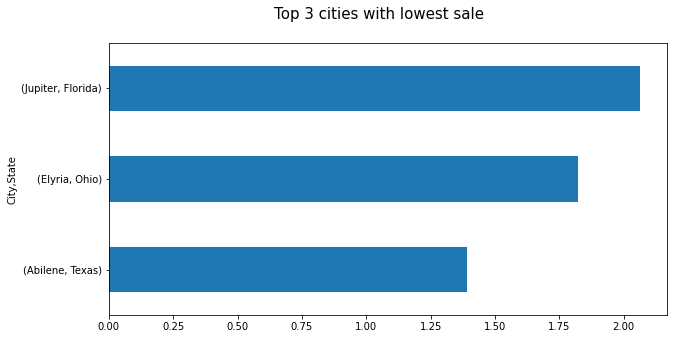

In [26]:
plt.figure(figsize=(10, 5)).suptitle('Top 3 cities with lowest sale', fontsize = 15)
X[:3].plot(kind='barh')
plt.show()

## 6. Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua.

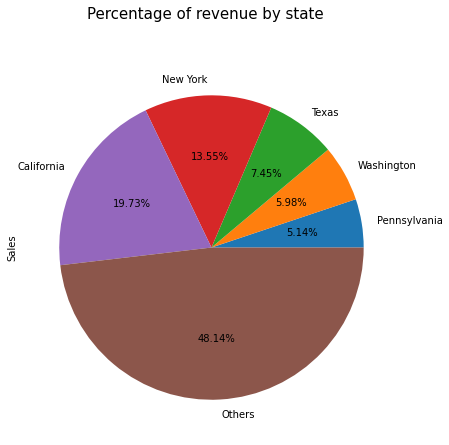

In [27]:
X = df.groupby(['State'])['Sales'].sum().sort_values()
total = X.sum()
X = X/total * 100
total_other = X[:-5].sum()

Y = X[-5:]
Y['Others'] = total_other

plt.figure(figsize=(7, 7)).suptitle('Percentage of revenue by state', fontsize = 15)
Y.plot(kind='pie', autopct='%.2f%%')
plt.show()

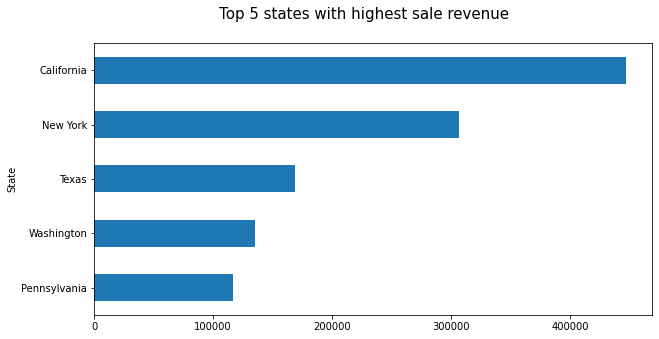

In [28]:
X = df.groupby(['State'])['Sales'].sum().sort_values()

plt.figure(figsize=(10, 5)).suptitle('Top 5 states with highest sale revenue', fontsize = 15)
X[-5:].plot(kind='barh')
plt.show()

## 7.Cho biết các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).

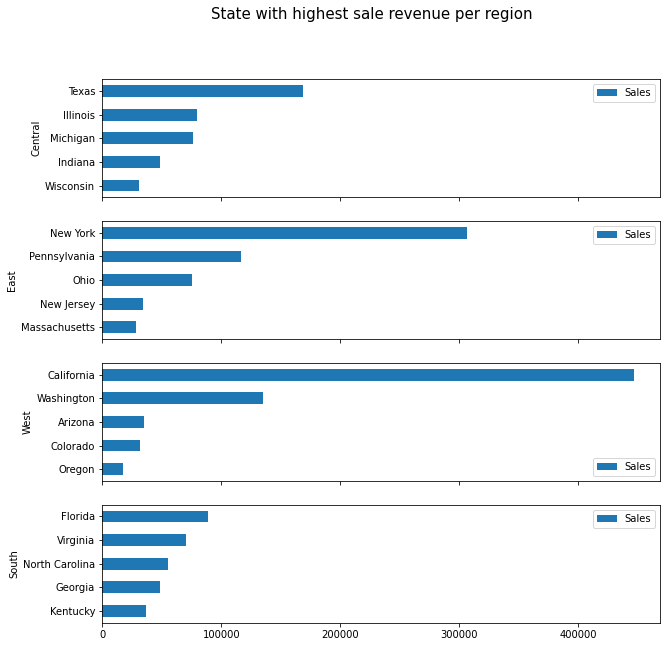

In [29]:
X = df.groupby(['State', 'Region'])['Sales'].sum().sort_values().reset_index().set_index('State')

fig, axes = plt.subplots(X['Region'].nunique(), sharex = True)
fig.suptitle('State with highest sale revenue per region', fontsize = 15)
fig.set_size_inches(10,10)

count = 0
for region in X['Region'].unique():
  X[X['Region'] == region].sort_values(by = 'Sales')[-5:].plot(kind = 'barh', ax = axes[count], xlabel = region)
  count += 1
plt.show()

## 8. Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.

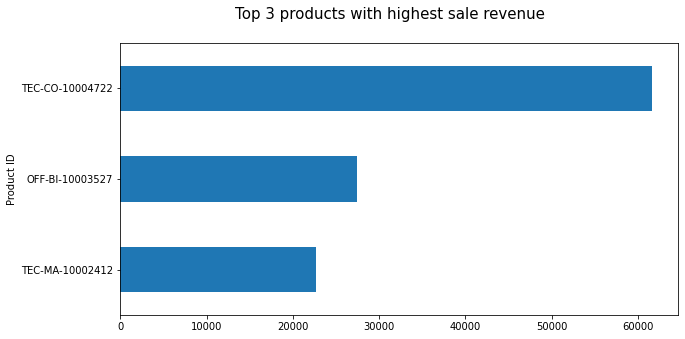

In [30]:
X = df.groupby(['Product ID'])['Sales'].sum().sort_values()

plt.figure(figsize=(10, 5)).suptitle('Top 3 products with highest sale revenue', fontsize = 15)
X[-3:].plot(kind='barh')
plt.show()

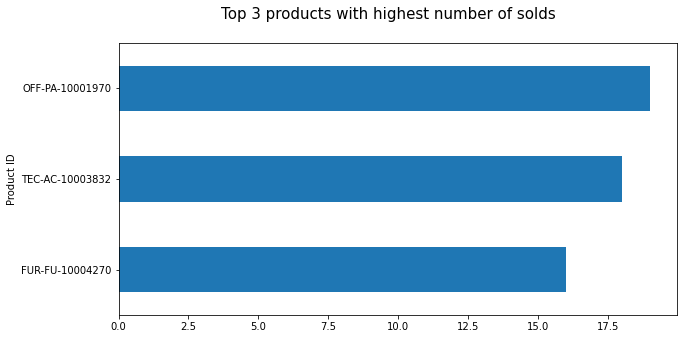

In [31]:
X = df.groupby(['Product ID'])['Sales'].count().sort_values()

plt.figure(figsize=(10, 5)).suptitle('Top 3 products with highest number of solds', fontsize = 15)
X[-3:].plot(kind='barh')
plt.show()

## 9. Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category.

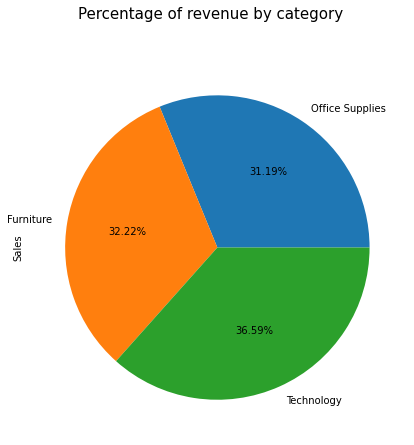

In [32]:
X = df.groupby(['Category'])['Sales'].sum().sort_values()

plt.figure(figsize=(7, 7)).suptitle('Percentage of revenue by category', fontsize = 15)
X.plot(kind='pie', autopct='%.2f%%')
plt.show()

## 10. Dự báo doanh số theo nhiều khía cạnh khác nhau trong tương lai: theo vùng, theo bang, theo category,.. và phát hành API để khai thác.

In [33]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days to Ship
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7 days
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,5 days
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,5 days
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,5 days


In [34]:
# Check date without data
X = df.groupby(['Order Date', 'Region', 'State', 'Category'])['Sales'].sum().reset_index()
X['Order Date'].nunique(),  X['Order Date'].max() - X['Order Date'].min()

(1230, Timedelta('1457 days 00:00:00'))

In [35]:
X

,Order Date,Region,State,Category,Sales
0,2015-01-03,Central,Texas,Office Supplies,16.448
1,2015-01-04,Central,Illinois,Office Supplies,288.060
2,2015-01-05,East,Pennsylvania,Office Supplies,19.536
3,2015-01-06,South,Georgia,Office Supplies,12.780
4,2015-01-06,South,Kentucky,Furniture,2573.820
...,...,...,...,...,...
6288,2018-12-30,East,New York,Furniture,323.136
6289,2018-12-30,East,New York,Office Supplies,52.776
6290,2018-12-30,East,New York,Technology,90.930
6291,2018-12-30,West,California,Office Supplies,34.624


> Observation: Data is too spare with too many zero. Many states does not have any sale in any categories for a number of days. With the dataset this small, we can try to predict sale of a category per month per region.

In [36]:
X = df.groupby([df['Order Date'].dt.to_period('M'), df['Region'], df['Category']])['Sales'].sum().reset_index()
all_date = pd.period_range(X['Order Date'].min(), X['Order Date'].max(), freq='M')
# print(all_date)
all_state = X['Region'].unique()
all_cat = X['Category'].unique()

names = ['Order Date', 'Region', 'Category']

ind = pd.MultiIndex.from_product([all_date, all_state, all_cat], names=names)
      
X = df.groupby([df['Order Date'].dt.to_period('M'), df['Region'], df['Category']])['Sales'].sum().reset_index().set_index(['Order Date', 'Region', 'Category'])
X = X.reindex(ind, fill_value = 0).sort_index()

train_sales = X

X

Sales
Order Date Region  Category                  
2015-01    Central Furniture          506.358
                   Office Supplies    996.408
                   Technology          31.200
           East    Furniture          199.004
                   Office Supplies    112.970
...                                       ...
2018-12    South   Office Supplies   5108.690
                   Technology        4515.764
           West    Furniture        12362.431
                   Office Supplies   9225.140
                   Technology        8064.524

[576 rows x 1 columns]

In [ ]:
rc_size = len(all_state) * len(all_cat)
max_sale = train_sales['Sales'].max()
X = np.array(train_sales['Sales']).reshape(-1, rc_size) / max_sale
max_date = len(train_sales) // rc_size;

timesteps = 12
startDay = 12
X_train = []
y_train = []
for i in range(timesteps, max_date - startDay):
    X_train.append(np.concatenate((X[i-timesteps:i].ravel(),[(i % 12)/12])))
    y_train.append(X[i]) 

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = []
y_test = []
for i in range(max_date - startDay, max_date):
    X_test.append(np.concatenate((X[i-timesteps:i].ravel(),[(i % 12)/12])))
    y_test.append(X[i]) 

X_test = np.array(X_test)
y_test = np.array(y_test)

In [59]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Initialising
regressor = Sequential()

# Adding the output layer
regressor.add(Dense(units = 256))
regressor.add(Dropout(0.4))
regressor.add(Dense(units = 512))
regressor.add(Dropout(0.4))
regressor.add(Dense(units = 256))
regressor.add(Dropout(0.4))
regressor.add(Dense(units = 128))
regressor.add(Dropout(0.4))
regressor.add(Dense(units = 12))

# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

epoch_no=100
batch_size=16
regressor.fit(X_train, y_train, epochs = epoch_no, batch_size = batch_size)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 5.0228
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 5.4542
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 3.1783
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 3.1139
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 2.3842
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 2.2285
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 2.2739
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 2.0700
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 1.5161
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 1.6563
Epoch 11/100
2/2 [==============================] - 0s 16ms/step - loss: 1.9221
Epoch 12/100
2/2 [==============================] - 0s 13ms/step - loss: 1.1955
Epoch 13/100
2/2 [==============================]

In [ ]:
res = regressor.predict(np.concatenate((X_train, X_test), axis = 0))
res *= max_sale
res = np.concatenate((np.zeros(shape = (12, 12)), res), axis = 0)
# res = np.pad(res, (max_date - startDay, 0), 'constant')
res.shape
# (X_train.shape, X_test.shape)
res = pd.DataFrame(res.ravel(), columns = ['Pred'])
g = pd.concat([train_sales.reset_index(), res], axis = 1)

g[144:]
# res.shape

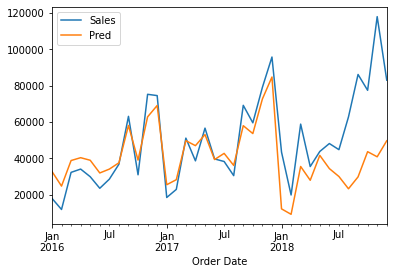

In [58]:
X = g.groupby(['Order Date']).sum()
X[12:].plot()

> Observation: Our model cannot predict very well the sales after 2018, but this is an advanced Python class so I didn't try to use other models to improve the accuracy